In [545]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressor:
    def __init__(self, learning_rate = 0.001, n_iterations = 10000, epsilon = 0.01):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.epsilon = epsilon
        self.model_parameters = None

    def _y_pred_(self, X, params):
        ones = np.ones(X.shape[0])
        return (np.dot(X,params[:-1]) + np.dot(ones, params[-1])).reshape(-1,1)

    def _error_(self, y_p, y):
        return (sum((y_p - y)**2))[0]/y.shape[0]

    def fit(self, X, y):
        delta = 0.000001
        num_parameters = X.shape[1] + 1
        self.model_parameters = np.random.rand(num_parameters)

        gradients = np.zeros(num_parameters)
        
        for j in range(self.n_iterations):
            for i in range(num_parameters):
                delta_i = np.zeros(num_parameters)
                delta_i[i] += delta
                gradients[i] = (self._error_(self._y_pred_(X,self.model_parameters + delta_i), y) - self._error_(self._y_pred_(X, self.model_parameters),y))/delta
            
            self.model_parameters -= self.learning_rate*gradients
            # print(f"gradients: {gradients}\nmodel parameters:{self.model_parameters}\n")
    
    def fit_(self, X, y):
        delta = 0.00001
        
        num_parameters = X.shape[1] + 1

        self.model_parameters = np.random.rand(num_parameters)
        gradients = np.zeros(num_parameters)
        eps = np.zeros_like(gradients) + self.epsilon
        X_ = np.insert(X,X.shape[1],np.ones(X.shape[0]), axis=1)
        delI = delta*np.identity(num_parameters)

        for i in range(self.n_iterations):
            params = np.zeros_like(delI) + self.model_parameters
            grads = delI + self.model_parameters
            gradients = (np.mean((np.dot(X_,grads.T) - y)**2, axis=0) - np.mean((np.dot(X_,params.T) - y)**2, axis=0))/delta
            self.model_parameters -= self.learning_rate*gradients
            if (np.abs(gradients) < eps).all(0):
                break

    def predict(self, X):
        X_ = np.insert(X,X.shape[1],np.ones(X.shape[0]), axis=1)
        
        return (np.dot(X_,self.model_parameters)).reshape(-1,1)

    def __repr__(self):
        return f"Model Parameters: {self.model_parameters}"
    

In [525]:
np.random.seed(10)
lr = LinearRegressor(learning_rate=0.001, n_iterations=100000)

num_inst = 10
X = 6*np.random.rand(num_inst,2) - 3
y = (4*X[:,0] + 5*X[:,1] + 3 + (np.random.rand(num_inst))/10).reshape(-1,1)

%time lr.fit_(X,y)
print(lr)
x2 = np.array([[10,10]])
lr.predict(x2)


CPU times: total: 203 ms
Wall time: 208 ms
Model Parameters: [3.99954702 4.9991613  3.04498495]


array([[93.03206812]])

CPU times: total: 312 ms
Wall time: 287 ms
Model Parameters: [3.02836156 5.32198399]


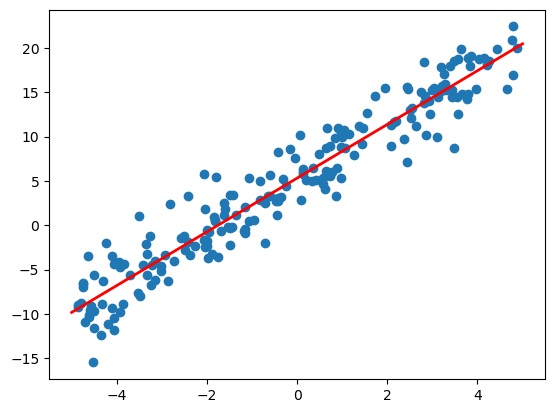

In [526]:
num_inst = 200
X = 10*np.random.rand(num_inst,1) - 5
y = 3*X + 5 + 2.5*np.random.randn(num_inst,1)

lr1 = LinearRegressor(0.001, 10000)
%time lr1.fit_(X,y)
print(lr1)

plt.scatter(X,y)
a = [-5, 5]
b = [a[0]*lr1.model_parameters[0] + lr1.model_parameters[1], a[1]*lr1.model_parameters[0] + lr1.model_parameters[1]]
plt.plot(a, b, color='r', linewidth=2)

Model Parameters: [ 2.03589992  0.98281616 -3.63662827]


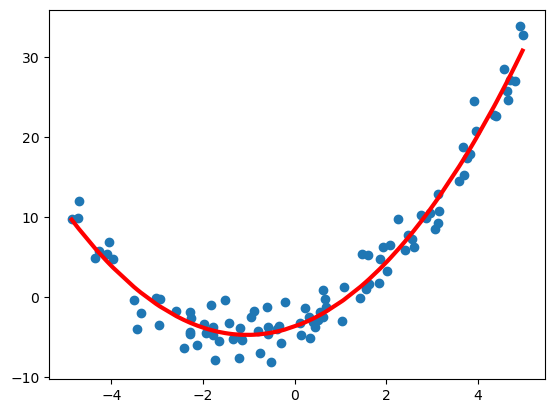

In [555]:
num_inst = 100
X = 10*np.random.rand(num_inst,1) - 5
X = (np.sort(X, axis=None)).reshape(-1,1)
y = 2*X + X**2 - 4 + 2*np.random.randn(num_inst,1)
X_ = np.insert(X,1,(X**2).reshape(-1),axis=1)

polyreg = LinearRegressor(learning_rate=0.001, n_iterations=10000, epsilon=0.1)
polyreg.fit(X_, y)
print(polyreg)

y_ = polyreg.predict(X_)

plt.scatter(X,y)
plt.plot(X_[:,0], y_, color='r', linewidth=3)

Model Parameters: [-1.09445596 -2.01376817  1.01466148  4.05433685]


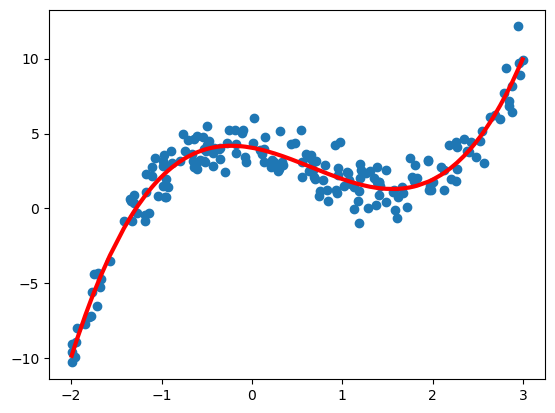

In [551]:
num_inst = 200
X = 5*np.random.rand(num_inst,1) - 2
X = (np.sort(X, axis=None)).reshape(-1,1)
y = -1*X - 2*X**2 + X**3 + 4 + np.random.randn(num_inst,1)
X_ = np.insert(X,1,(X**2).reshape(-1),axis=1)
X_ = np.insert(X_,2,(X**3).reshape(-1),axis=1)
plt.scatter(X,y)

polyreg = LinearRegressor(learning_rate=0.001, n_iterations=10000, epsilon=0.1)
polyreg.fit(X_, y)
print(polyreg)

y_ = polyreg.predict(X_)

plt.plot(X_[:,0], y_, color='r', linewidth=3)